In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [3]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['Price'] = data.target

In [4]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
df.shape

(20640, 9)

In [7]:
# taking 20% of the data for our case
df = df.sample(frac=0.20)

In [8]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
2179,3.3125,22.0,6.175549,1.040752,1066.0,3.341693,36.79,-119.90,1.061
15387,7.0177,17.0,6.405694,1.110320,891.0,3.170819,33.29,-117.05,2.676
1158,4.5156,35.0,6.122034,0.993220,683.0,2.315254,39.53,-121.53,0.912
7906,4.3397,21.0,5.373239,1.098592,1588.0,2.795775,33.86,-118.10,2.681
5668,3.3397,28.0,4.530686,1.052347,1388.0,2.505415,33.72,-118.30,2.678
...,...,...,...,...,...,...,...,...,...
8888,4.2520,31.0,3.978296,1.039389,1985.0,1.595659,34.03,-118.49,4.367
15312,1.9386,17.0,4.406103,1.363850,1288.0,3.023474,33.20,-117.38,1.063
19990,3.3350,11.0,5.379074,1.063465,2013.0,3.452830,36.19,-119.32,0.697
12589,2.2574,37.0,4.702576,1.091335,1261.0,2.953162,38.52,-121.50,0.591


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [10]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2179,3.3125,22.0,6.175549,1.040752,1066.0,3.341693,36.79,-119.90
15387,7.0177,17.0,6.405694,1.110320,891.0,3.170819,33.29,-117.05
1158,4.5156,35.0,6.122034,0.993220,683.0,2.315254,39.53,-121.53
7906,4.3397,21.0,5.373239,1.098592,1588.0,2.795775,33.86,-118.10
5668,3.3397,28.0,4.530686,1.052347,1388.0,2.505415,33.72,-118.30
...,...,...,...,...,...,...,...,...
8888,4.2520,31.0,3.978296,1.039389,1985.0,1.595659,34.03,-118.49
15312,1.9386,17.0,4.406103,1.363850,1288.0,3.023474,33.20,-117.38
19990,3.3350,11.0,5.379074,1.063465,2013.0,3.452830,36.19,-119.32
12589,2.2574,37.0,4.702576,1.091335,1261.0,2.953162,38.52,-121.50


In [11]:
y

2179     1.061
15387    2.676
1158     0.912
7906     2.681
5668     2.678
         ...  
8888     4.367
15312    1.063
19990    0.697
12589    0.591
3289     0.724
Name: Price, Length: 4128, dtype: float64

# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model

DecisionTreeRegressor()

In [22]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred

array([3.439  , 2.938  , 2.679  , 0.962  , 1.625  , 4.286  , 2.508  ,
       1.724  , 1.93   , 0.743  , 4.841  , 1.637  , 2.935  , 2.889  ,
       2.482  , 1.417  , 1.813  , 2.154  , 1.589  , 1.734  , 5.00001,
       2.961  , 3.131  , 0.976  , 2.201  , 1.569  , 0.578  , 3.912  ,
       1.294  , 2.579  , 4.5    , 2.26   , 3.289  , 2.109  , 2.765  ,
       2.715  , 4.185  , 1.125  , 1.625  , 5.00001, 1.032  , 1.554  ,
       3.221  , 1.032  , 0.9    , 1.639  , 0.713  , 1.936  , 2.961  ,
       2.73   , 1.563  , 1.2    , 1.757  , 3.714  , 2.908  , 1.856  ,
       1.759  , 3.313  , 3.6    , 0.544  , 2.137  , 2.663  , 2.353  ,
       1.648  , 0.947  , 0.906  , 1.575  , 0.567  , 1.833  , 1.899  ,
       1.062  , 2.906  , 3.527  , 2.477  , 1.401  , 4.125  , 1.15   ,
       3.963  , 1.614  , 2.188  , 5.00001, 1.945  , 1.224  , 1.516  ,
       1.125  , 1.005  , 1.463  , 0.72   , 1.026  , 1.798  , 2.603  ,
       1.054  , 3.424  , 4.838  , 1.382  , 4.232  , 5.00001, 0.978  ,
       2.172  , 0.87

In [29]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.49764797540286365

# Hyperparameter tuning

In [32]:
parameter = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'max_features': ['sqrt', 'log2', 'auto']
}
regressor = DecisionTreeRegressor()



In [35]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(regressor, param_grid=parameter, cv = 3, scoring = 'neg_mean_squared_error')

In [36]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [38]:
model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'max_features': 'auto',
 'splitter': 'best'}

In [41]:
final_model = DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='sqrt', splitter='best')

In [42]:
final_model

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='sqrt')

In [43]:
final_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=6, max_features='sqrt')

[Text(0.5239583333333333, 0.9285714285714286, 'x[2] <= 6.292\npoisson = 0.297\nsamples = 3302\nvalue = 2.04'),
 Text(0.26666666666666666, 0.7857142857142857, 'x[0] <= 3.226\npoisson = 0.24\nsamples = 2661\nvalue = 1.846'),
 Text(0.13333333333333333, 0.6428571428571429, 'x[0] <= 2.511\npoisson = 0.174\nsamples = 1336\nvalue = 1.394'),
 Text(0.06666666666666667, 0.5, 'x[6] <= 35.3\npoisson = 0.149\nsamples = 762\nvalue = 1.199'),
 Text(0.03333333333333333, 0.35714285714285715, 'x[2] <= 3.673\npoisson = 0.143\nsamples = 396\nvalue = 1.419'),
 Text(0.016666666666666666, 0.21428571428571427, 'x[7] <= -118.295\npoisson = 0.131\nsamples = 139\nvalue = 1.769'),
 Text(0.008333333333333333, 0.07142857142857142, 'poisson = 0.203\nsamples = 33\nvalue = 2.416'),
 Text(0.025, 0.07142857142857142, 'poisson = 0.064\nsamples = 106\nvalue = 1.568'),
 Text(0.05, 0.21428571428571427, 'x[7] <= -116.9\npoisson = 0.114\nsamples = 257\nvalue = 1.229'),
 Text(0.041666666666666664, 0.07142857142857142, 'poisson

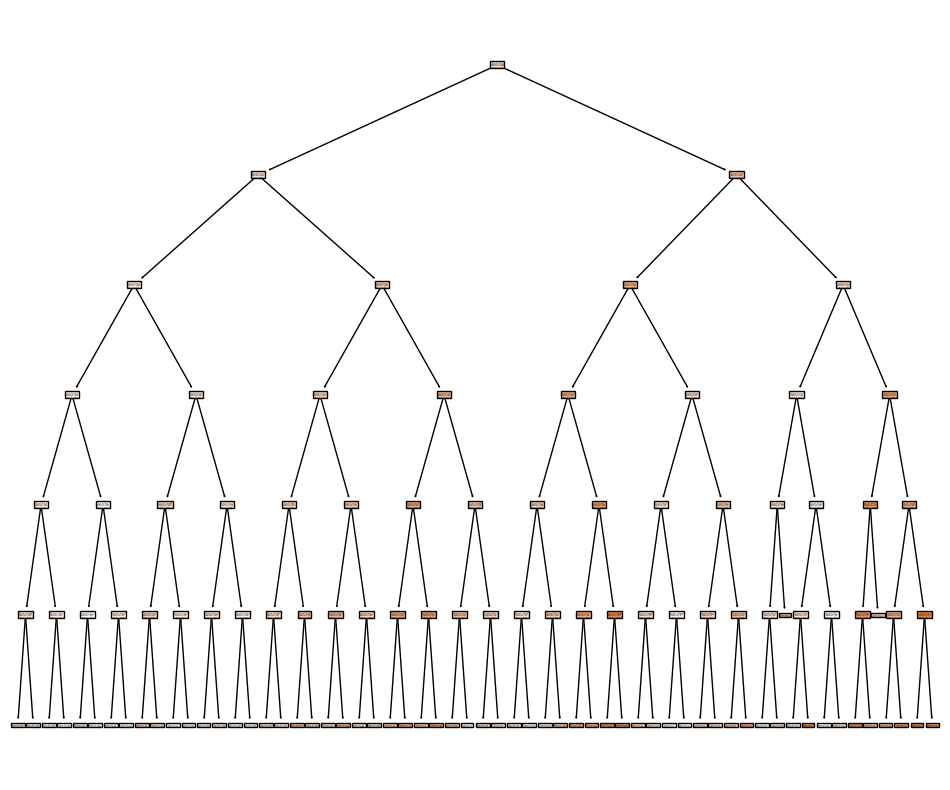

In [47]:
from sklearn import tree
plt.figure(figsize = (12, 10))
tree.plot_tree(final_model, filled = True)

In [48]:
y_pred = model.predict(X_test)

In [49]:
r2_score(y_pred, y_test)

0.44387785295085547